# Section A. Model Complexity and Model Selection
## Question 1 [KNN Regressor, 20 Marks]

Implement the KNN regressor function:

- Step 1: Determine parameter K = number of nearest neighbors.
- Step 2: Calculate the distance between the query-instance and all the
training examples.
- Step 3: Sort the distance and determine nearest neighbors.
- Step 4: Gather the category Y of the nearest neighbors.
- Step 5: Use the average of the neighbor's value as the prediction value of the query instance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.spatial import distance

### Load Training and Testing Sets

In [5]:
trainT1A = pd.read_table('assessments_datasets/Task1A_train.csv', sep=",")
testT1A = pd.read_table('assessments_datasets/Task1A_test.csv', sep=",")

### Q1-1 Define KNN regressor function

In [6]:
# define knn regressor function 
def KNN(train_data, train_label, test_data, K):
    
    # get data
    trainData = train_data.ix[:,:-1]
    trainLabel = train_label.ix[:,-1:]
    testData = test_data.ix[:,:-1]
    
    dist = []
    neighbors = []
    distances = []
    dists = []
    avgList = []
    result = []
    result1 = []
    y_list = []
    y_list1 = []
    
    # calculus distance
    for i in range(len(testData)):
        dists = []
        for j in range(len(trainData)):
            #dist = []
            dist = distance.euclidean(testData.iloc[i],trainData.iloc[j])
            #dists.append((testData.iloc[i],trainData.iloc[j],trainLabel.iloc[j],dist))
            dists.append(dist)
        result.append(dists)
       

    index = np.argsort(np.array(result))

    neighbors=[]
    
    # find neighbors
    for i in range(len(index)):
        neighbors.append(index[i][:K])

    
    # find y
    for i in range(len(result)):
        for k in range(K):
            y = np.array(trainLabel)[neighbors[i][k]]
            y_list.append(y)
        y_list1.append(y_list) 
        y_list = []

    #avg labels
    for i in range(len(y_list1)):
        avg = sum(y_list1[i])/float(len(y_list1[i]))
        #print (avg)
        avgList.append(avg)
    #print (avgList)
    return avgList

### Implement the Knn regressor function, set k = 3

In [7]:
predict = KNN(trainT1A,trainT1A,testT1A, K = 3)

/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [8]:
print(predict)

[array([0.72333333]), array([0.72333333]), array([0.79333333]), array([0.75]), array([0.85333333]), array([0.82333333]), array([0.91666667]), array([1.05333333]), array([1.05333333]), array([1.28333333]), array([1.29]), array([1.29]), array([1.52333333]), array([1.74]), array([1.63]), array([1.9]), array([2.01]), array([2.4]), array([2.4]), array([2.55]), array([3.36]), array([3.36]), array([4.26]), array([4.74]), array([5.16]), array([5.73]), array([5.73]), array([6.06]), array([6.51]), array([7.23]), array([7.23]), array([7.95]), array([8.52]), array([9.12]), array([10.32]), array([11.19]), array([12.69]), array([13.68]), array([15.03]), array([15.69]), array([15.69]), array([15.69])]


### Q1-2  Plot the training and the testing errors versus 1/K 

In [10]:
# define mean squre error
def Mse(predict_label,train_label):
    error=0
    for i in range(len(predict_label)):
        error += (predict_label[i] - train_label.iloc[i].tolist())**2
        MSE = np.sqrt(error/len(predict_label))
    return MSE

#### Test Knn and Mse function,  when k=1,  the train error will equal to zero, because train data set use knn to predict itself.

In [20]:
# train - train
# test Knn and Mse function, 
y_actual = trainT1A.ix[:,-1:]
y_predicted = KNN(trainT1A,trainT1A,trainT1A, K = 1)
rmse_val = Mse(y_predicted, y_actual)
rmse_val

array([0.])

In [28]:
# training error
y_predicted = []
y_actual = trainT1A.ix[:,-1:]
training_error = []

for k in range(1,21):
    #result = []
    y_predicted = KNN(trainT1A,trainT1A,trainT1A, K = k)
    rmse_val = Mse(y_predicted, y_actual)
    training_error.append(rmse_val)
    
print ('training_error',training_error)

training_error [array([0.]), array([0.34393383]), array([0.31038847]), array([0.37144425]), array([0.39776818]), array([0.55555105]), array([0.66457257]), array([0.85082554]), array([0.94749791]), array([1.09837113]), array([1.2087154]), array([1.34743101]), array([1.45093158]), array([1.57054062]), array([1.65897583]), array([1.76194611]), array([1.86416783]), array([1.95388618]), array([2.05854375]), array([2.15522257])]


In [29]:
# testing error
y_predicted = []
y_actual = testT1A.ix[:,-1:]
testing_error = []

for k in range(1,21):
    #result = []
    y_predicted = KNN(trainT1A,trainT1A,testT1A, K = k)
    rmse_val = Mse(y_predicted, y_actual)
    testing_error.append(rmse_val)
    
print ('testing_error',testing_error)

testing_error [array([1.67247464]), array([1.45831095]), array([1.52727539]), array([1.3611987]), array([1.39806301]), array([1.21365457]), array([1.20436788]), array([1.08478175]), array([1.1211267]), array([1.02276361]), array([1.07657027]), array([1.05316653]), array([1.08070505]), array([1.130928]), array([1.17494908]), array([1.23916966]), array([1.26118044]), array([1.35855869]), array([1.42288653]), array([1.50896149])]


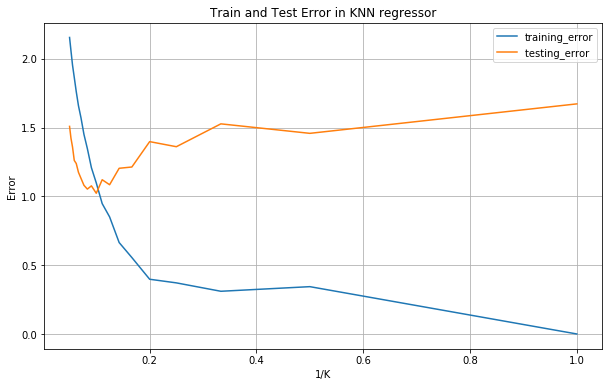

In [33]:
#draw plot

x = []
for i in range(1,21):
    x.append(1/i)
    
y1 = training_error
x1 = x

y2 = testing_error
x2 = x


plt.figure(figsize=(10, 6))
plt.plot(x1,y1,'',label="training_error")
plt.plot(x2,y2,'',label="testing_error ")

plt.title('Train and Test Error in KNN regressor')
plt.legend(loc='upper right')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.grid(x1)
plt.show()

### Q1-3 Report the optimum value for K in terms of the testing error. Discuss the values of K corresponding to underfitting and overfitting based on your plot in the previous part (Part II).

 - The optimum value for K : k =2

For the various values of 1/K, The test set error is a measure of how well we are doing in predicting the values of y for new data observations of x. We note from 'Train and Test Error in KNN regressor' Plot that small values of 1/K (in the range 0-0.1) give relatively large values of the test set error, and this can be attributed to the fact that the corresponding polynomials are rather inflexible and are incapable of capturing the oscillations in the
function Knn(i.e. under-fitting). Values of 1/K = 0.1 (K=2) give the small values for the test set error, and these also give reasonable representations of the generating function Knn.  For 1/K = 1, the training set error goes to zero; however, the test set error has become very large (i.e. over-fitting). As we saw in Plot, the corresponding function exhibits wild oscillations.